In [1]:
from sklearn import datasets, neighbors
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from random import randint
import time
from keras.utils import to_categorical
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from modAL.models import ActiveLearner
from modAL.uncertainty import uncertainty_sampling
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from modAL.uncertainty import uncertainty_sampling
from IPython import display
from functools import partial
from modAL.batch import uncertainty_batch_sampling

In [2]:
data = pd.read_csv(r"C:\Users\Thinkpad X270\Desktop\M2 ASD\ML avancé\Projet ML avancé\Dataset.txt")

In [3]:
y = data.iloc[:,31] 
X= data.drop(data.columns[31], axis=1)


In [4]:
print("X shape:", X.shape[0:])
print("y shape:", y.shape[0:])

X shape: (5599, 31)
y shape: (5599,)


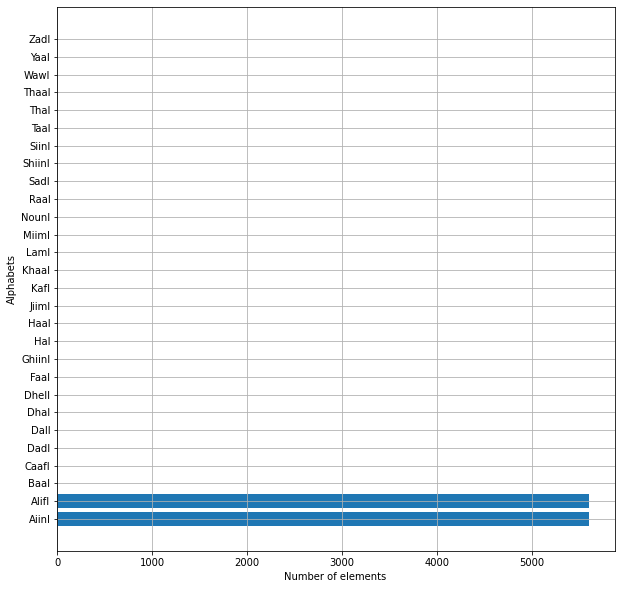

In [7]:
y_int = pd.get_dummies(y)
y_int = np.int0(y_int)
count = np.zeros(28, dtype='int')
alphabets = []
for i in y_int:
    count[i] +=1
for i in y:
 if i not in alphabets: 
    alphabets.append(i)
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, count)
plt.xlabel("Number of elements ")
plt.ylabel("Alphabets")
plt.grid()
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [9]:
print("X train shape:", X_train.shape[0:])
print("y train shape:", y_train.shape[0:])
print("X test shape:", X_test.shape[0:])
print("y test shape:", y_test.shape[0:])

X train shape: (3919, 31)
y train shape: (3919, 28)
X test shape: (1680, 31)
y test shape: (1680, 28)


In [10]:
def lets_knn(X_train, y_train, X_test, y_test, n_neighbors=3, weights='uniform', print_wrong_pred=False):
    t0 = time.time()
    # creating and training knn classifier
    knn = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)
    knn.fit(X_train, y_train)
    t1 = time.time()

    # predicting classes and comparing them with actual labels
    pred = knn.predict(X_test)
    t2 = time.time()
    # calculating accuracy
    accuracy = round(np.mean(pred == y_test)*100, 1)

    print("Accuracy of", weights ,"KNN with", n_neighbors, "neighbors:", accuracy,"%. Fit in",
          round(t1 - t0, 1), "s. Prediction in", round(t2 - t1, 1), "s")

    # selecting wrong predictions with correct and wrong labels
    wrong_pred = X_test[(pred != y_test)]
    correct_labels = y_test[(pred != y_test)]
    wrong_labels = pred[(pred != y_test)]
   
    if print_wrong_pred:
        # in order to print different sized photos, we need to determine to what shape we want to reshape
        size = int(np.sqrt(X_train.shape[1]))
        for n, (digit, wrong_label, correct_label) in enumerate(zip(wrong_pred, wrong_labels, correct_labels)):
           print("Correct: " + str(correct_label) + ". Predicted: " + str(wrong_label))
          

In [11]:
lets_knn(X_train, y_train, X_test, y_test, 5, 'uniform', print_wrong_pred=True)

Accuracy of uniform KNN with 5 neighbors: AiinI     97.6
AlifI     99.9
BaaI      99.4
CaafI     97.1
DadI      98.2
DalI      98.9
DhaI      96.4
DhelI     99.3
FaaI      98.1
GhiinI    98.5
HaI       99.9
HaaI      96.2
JiimI     96.7
KafI      99.0
KhaaI     97.9
LamI      98.7
MiimI     99.9
NounI     98.8
RaaI      98.9
SadI      97.9
ShiinI    98.0
SiinI     98.2
TaaI      98.2
ThaI      98.0
ThaaI     96.3
WawI      99.7
YaaI      98.0
ZadI      98.6
dtype: float64 %. Fit in 0.0 s. Prediction in 1.8 s
Correct: AiinI. Predicted: 0
Correct: AlifI. Predicted: 1
Correct: BaaI. Predicted: 0
Correct: CaafI. Predicted: 0
Correct: DadI. Predicted: 1
Correct: DalI. Predicted: 1
Correct: DhaI. Predicted: 0
Correct: DhelI. Predicted: 0
Correct: FaaI. Predicted: 1
Correct: GhiinI. Predicted: 0
Correct: HaI. Predicted: 1
Correct: HaaI. Predicted: 0
Correct: JiimI. Predicted: 0
Correct: KafI. Predicted: 0
Correct: KhaaI. Predicted: 0
Correct: LamI. Predicted: 0
Correct: MiimI. Predicted: 0
Co

C:\Users\Thinkpad X270\anaconda3\envs\myenv1\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


# Ranked batch-mode sampling

In [4]:
from sklearn.decomposition import PCA
RANDOM_STATE_SEED = 123
np.random.seed(RANDOM_STATE_SEED)
# Define our PCA transformer and fit it onto our raw dataset.
pca = PCA(n_components=2, random_state=RANDOM_STATE_SEED)
transformed_X = pca.fit_transform(X=X)

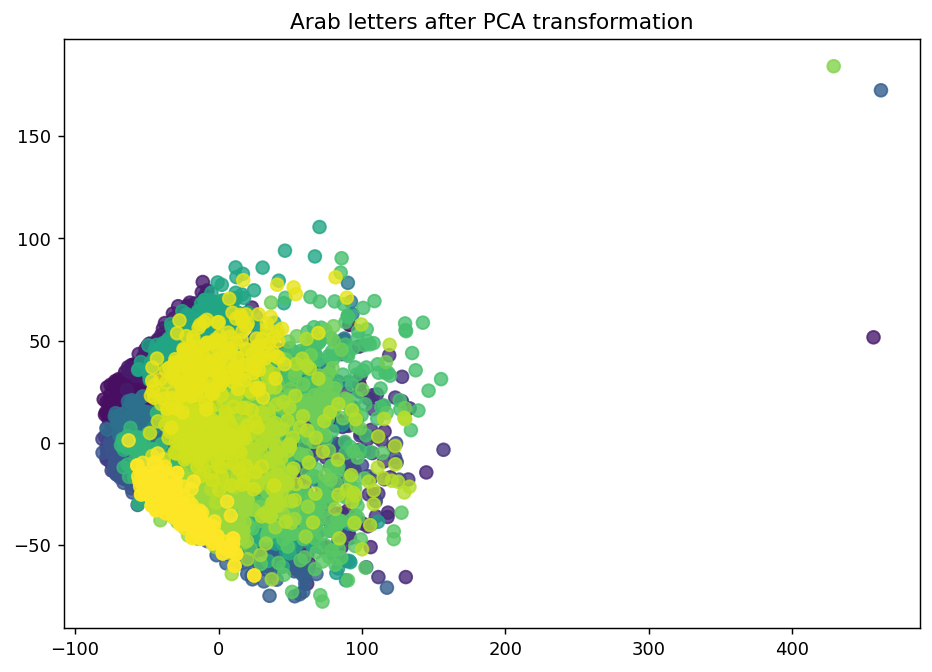

In [5]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
yc = label_encoder.fit_transform(y)
# Isolate the data we'll need for plotting.
x_component, y_component = transformed_X[:, 0], transformed_X[:, 1]

# Plot our dimensionality-reduced (via PCA) dataset.
plt.figure(figsize=(8.5, 6), dpi=130)
plt.scatter(x=x_component, y=y_component, c=yc, cmap='viridis', s=50, alpha=8/10)
plt.title('Arab letters after PCA transformation')
plt.show()

In [6]:
X = X.to_numpy()
y = y.to_numpy()
# Isolate our examples for our labeled dataset.
n_labeled_examples = X.shape[0]
training_indices = np.random.randint(low=0, high=n_labeled_examples + 1, size=3)

X_train = X[training_indices]
y_train = y[training_indices]

# Isolate the non-training examples we'll be querying.
X_pool = np.delete(X, training_indices, axis=0)
y_pool = np.delete(y, training_indices, axis=0)

In [7]:
from sklearn.neighbors import KNeighborsClassifier

# Specify our core estimator.
knn = KNeighborsClassifier(n_neighbors=3)

In [8]:

# Pre-set our batch sampling to retrieve 3 samples at a time.
BATCH_SIZE = 1000
preset_batch = partial(uncertainty_batch_sampling, n_instances=BATCH_SIZE)

# Specify our active learning model.
learner = ActiveLearner(
  estimator=knn,
  X_training=X_train,
  y_training=y_train,

  query_strategy=preset_batch
)


In [9]:
# Isolate the data we'll need for plotting.
predictions = learner.predict(X)
is_correct = (predictions == y)

predictions

array(['NounI', 'NounI', 'NounI', ..., 'NounI', 'NounI', 'NounI'],
      dtype=object)

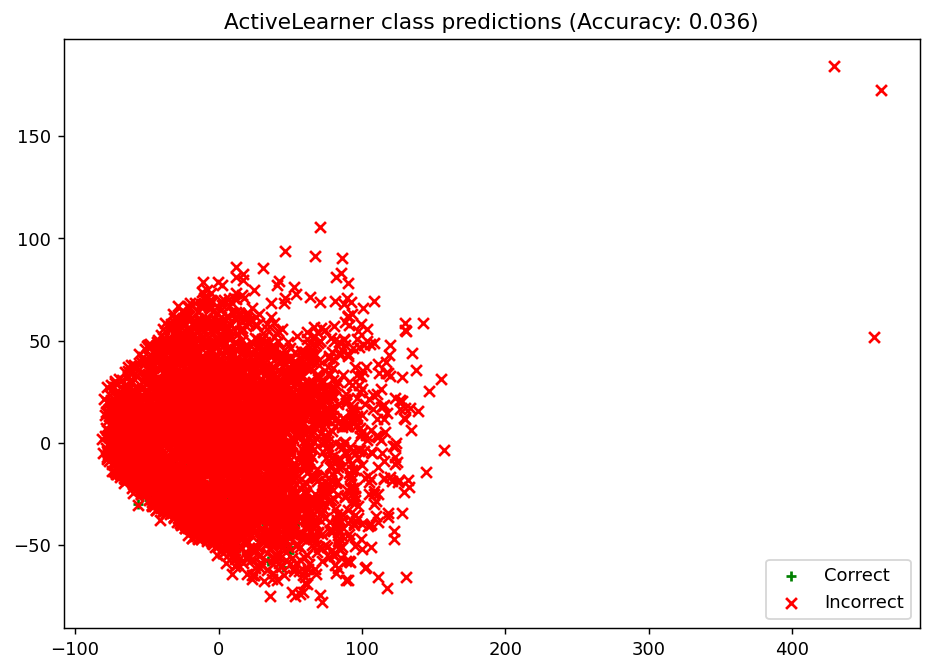

In [10]:
# Record our learner's score on the raw data.
unqueried_score = learner.score(X, y)

# Plot our classification results.
fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)
ax.scatter(x=x_component[is_correct],  y=y_component[is_correct],  c='g', marker='+', label='Correct')
ax.scatter(x=x_component[~is_correct], y=y_component[~is_correct], c='r', marker='x', label='Incorrect')
ax.legend(loc='lower right')
ax.set_title("ActiveLearner class predictions (Accuracy: {score:.3f})".format(score=unqueried_score))
plt.show()

In [11]:
# Pool-based sampling
N_RAW_SAMPLES = 5000
N_QUERIES = N_RAW_SAMPLES // BATCH_SIZE

performance_history = [unqueried_score]

for index in range(N_QUERIES):
    query_index, query_instance = learner.query(X_pool)

    # Teach our ActiveLearner model the record it has requested.
    X, y = X_pool[query_index], y_pool[query_index]
    learner.teach(X=X, y=y)

    # Remove the queried instance from the unlabeled pool.
    X_pool = np.delete(X_pool, query_index, axis=0)
    y_pool = np.delete(y_pool, query_index)

    # Calculate and report our model's accuracy.
    model_accuracy = learner.score(X, y)
    print('Accuracy after query {n}: {acc:0.4f}'.format(n=index + 1, acc=model_accuracy))

    # Save our model's performance for plotting.
    performance_history.append(model_accuracy)

Accuracy after query 1: 0.7850
Accuracy after query 2: 0.8230
Accuracy after query 3: 0.8240
Accuracy after query 4: 0.8410
Accuracy after query 5: 0.9500


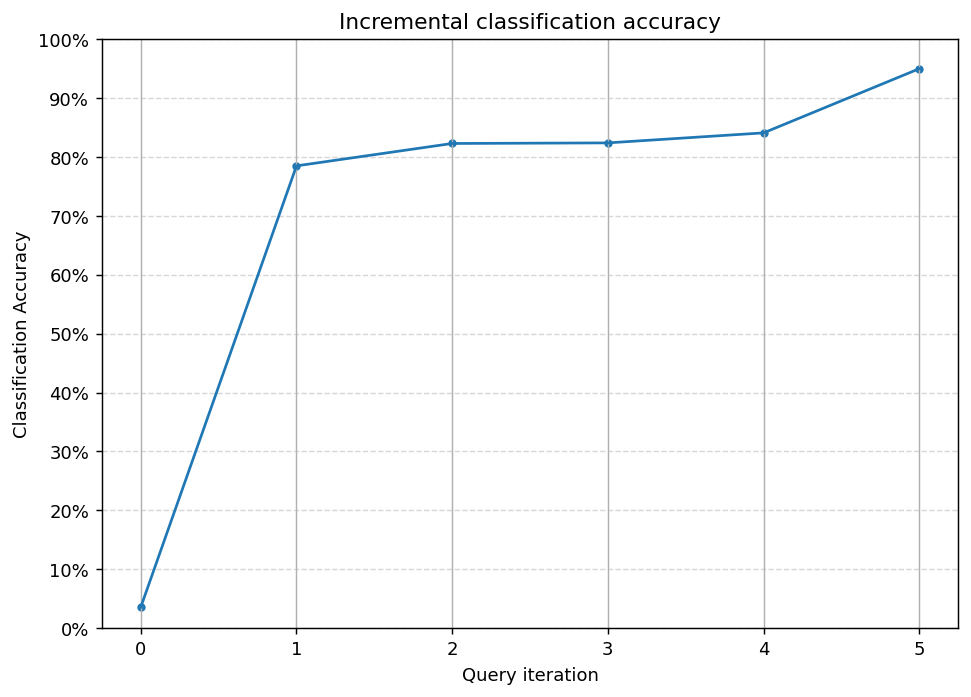

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# Plot our performance over time.
fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)

ax.plot(performance_history)
ax.scatter(range(len(performance_history)), performance_history, s=13)

ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=N_QUERIES + 3, integer=True))
ax.xaxis.grid(True)

ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))
ax.set_ylim(bottom=0, top=1)
ax.yaxis.grid(True, linestyle='--', alpha=1/2)

ax.set_title('Incremental classification accuracy')
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')

plt.show()


In [89]:
x_component, y_component = transformed_X[:, 0], transformed_X[:, 1]


In [90]:
# Isolate the data we'll need for plotting.
predictions = learner.predict(X)
is_correct = (predictions == y)
is_correct.resize(5599)

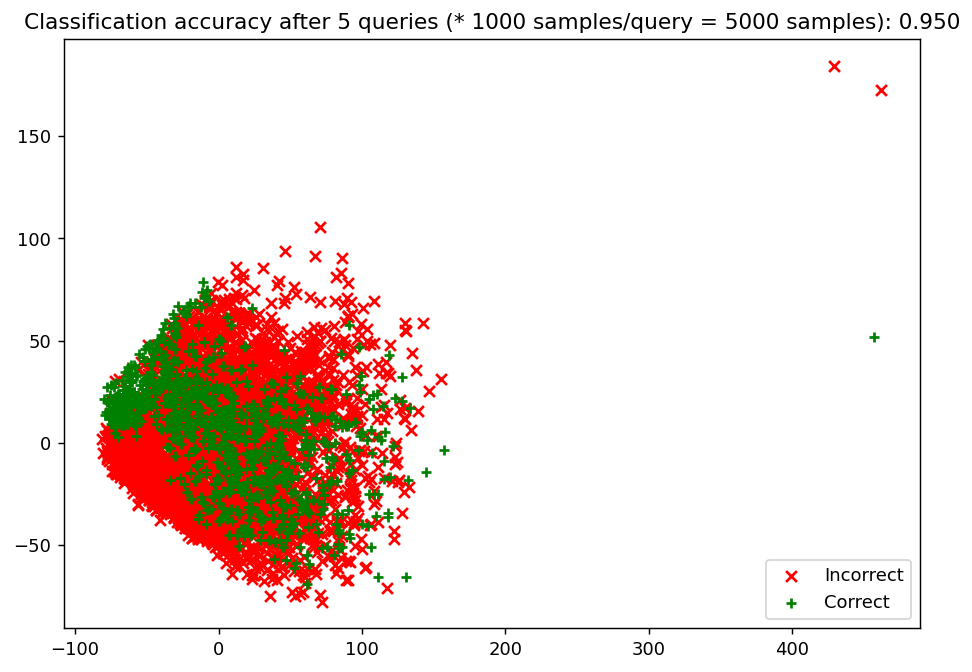

In [92]:
# Plot our updated classification results once we've trained our learner.
fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)

ax.scatter(x=x_component[~is_correct], y=y_component[~is_correct], c='r', marker='x', label='Incorrect')
ax.scatter(x=x_component[is_correct],  y=y_component[is_correct],  c='g', marker='+', label='Correct')

ax.set_title('Classification accuracy after {n} queries (* {batch_size} samples/query = {total} samples): {final_acc:.3f}'.format(
    n=N_QUERIES,
    batch_size=BATCH_SIZE,
    total=N_QUERIES * BATCH_SIZE,
    final_acc=performance_history[-1]
))
ax.legend(loc='lower right')

plt.show()